Linear Regression -> R²: 0.6688, MSE: 24.29
Ridge Regression -> R²: 0.6662, MSE: 24.48


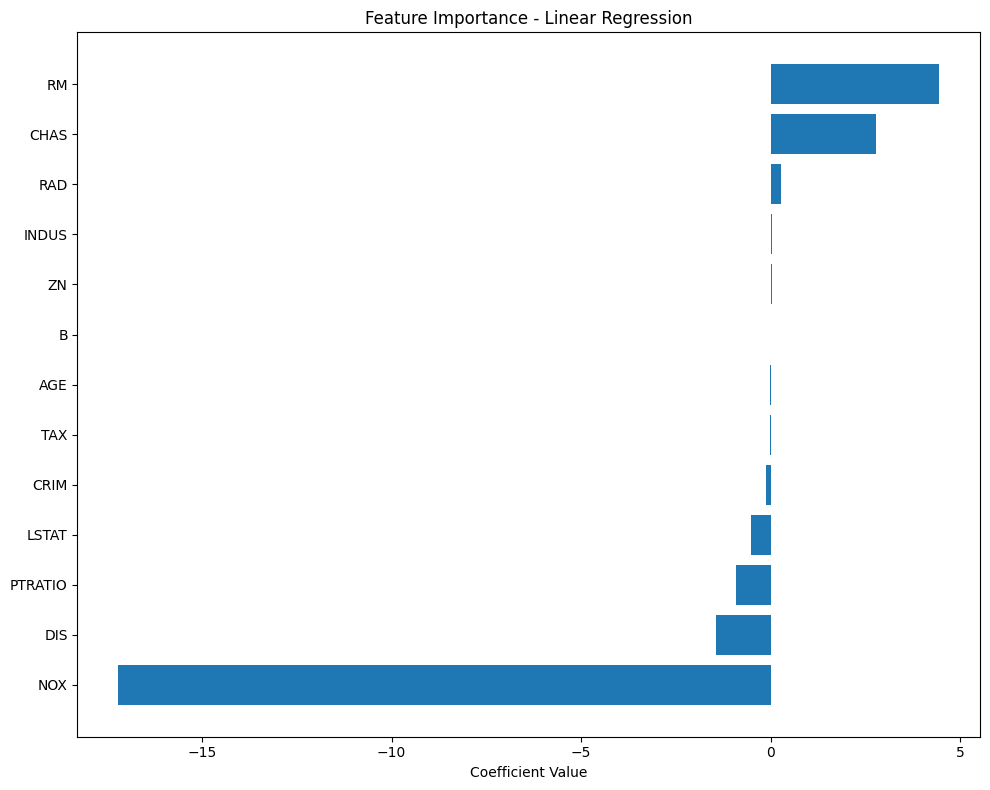

NameError: name 'test_ids' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/HP/Desktop/Syncner/Datasets/boston.csv')

y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Linear Regression R2: {r2_lin:.4f}, MSE: {mse_lin:.4f}")
print(f"Ridge Regression R2: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}")

plt.figure(figsize=(10,6))
features = df.columns.drop('MEDV')
coef_lin = lin_reg.coef_
coef_ridge = ridge_reg.coef_

plt.bar(features, coef_lin, alpha=0.7, label='Linear Regression')
plt.bar(features, coef_ridge, alpha=0.7, label='Ridge Regression')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance Comparison')
plt.legend()
plt.tight_layout()
plt.show()
